In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv'
df = pd.read_csv(url)

In [32]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


Data hanya berupa fitur x yang isinya angka saja, tidak perlu ada perubahan labeling apapun. Langsung proses model

In [33]:
df1 = df.copy()

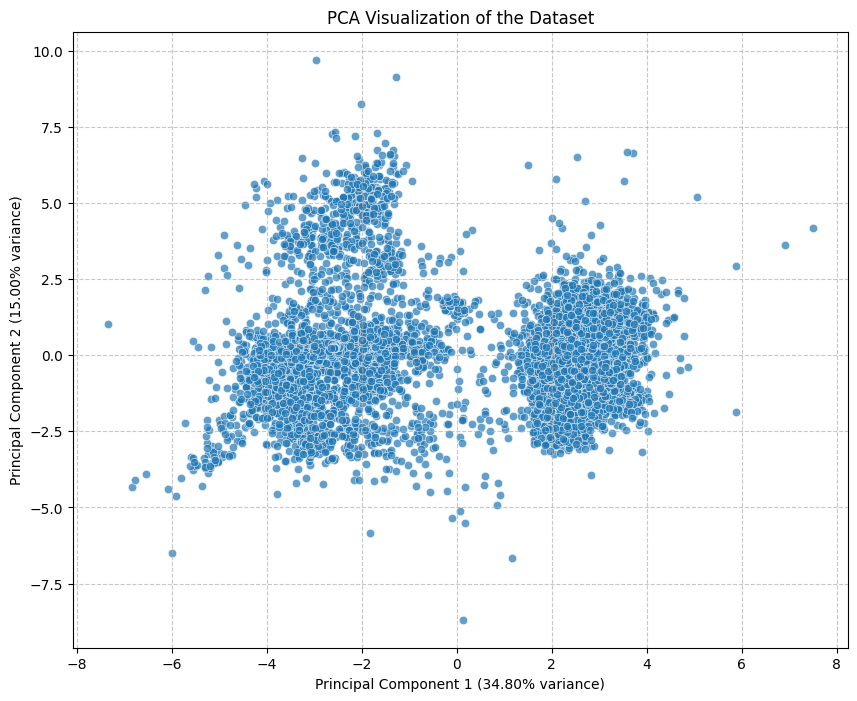

In [34]:
# Perform PCA for dimensionality reduction and visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.title('PCA Visualization of the Dataset')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True, linestyle='--', alpha=0.7)



Sebelum proses model, kita visualisasi dataset, sekilas terlihat kita dapat mengelompokkan data dalam 2 atau 3 cluster

### Kita akan menggunakan beberapa cara untuk menentukan cluster
Pertama adalah elbow/knee method (metode siku)

Elbow method adalah teknik untuk menentukan jumlah cluster (k) yang optimal dalam algoritma clustering seperti K-Means. 
Metode ini bekerja dengan menghitung nilai inertia (jumlah kuadrat jarak dari setiap titik data ke centroid cluster terdekatnya) 
untuk berbagai nilai k.

Formula inertia dalam K-Means:
Inertia = Σ min(||x_i - μ_j||²)

Dimana:
- x_i adalah titik data
- μ_j adalah centroid cluster
- ||x_i - μ_j||² adalah jarak Euclidean kuadrat antara titik data dan centroid

Pada grafik inertia vs jumlah cluster, kita mencari "siku" atau titik di mana penambahan cluster tidak lagi 
memberikan pengurangan inertia yang signifikan. Titik ini menandakan jumlah cluster optimal.

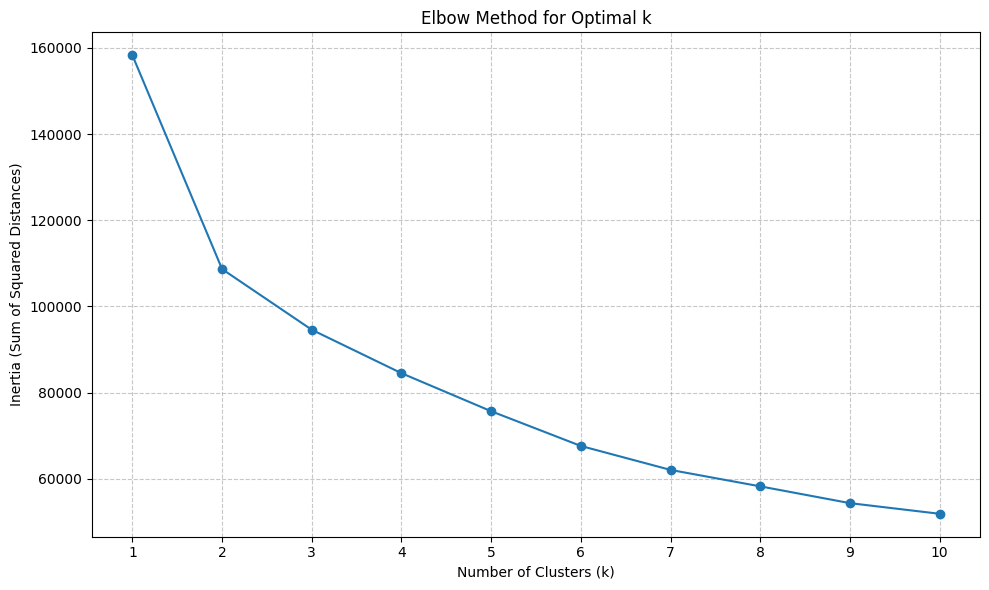

In [35]:
# Elbow Method for Determining Optimal Number of Clusters
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_range)
plt.tight_layout()


Elbow method menunjukkan adanya terjun ke K = 2, mungkin dapat dipakai nanti di clustering.

# Metode Silhouette Score

Silhouette Score adalah metrik untuk mengukur seberapa baik setiap objek dikelompokkan dalam cluster-nya dibandingkan dengan cluster lainnya. Nilai Silhouette Score berkisar antara -1 hingga 1:

- Nilai mendekati 1: objek dikelompokkan dengan tepat dalam cluster yang sesuai
- Nilai mendekati 0: objek berada di perbatasan antara dua cluster
- Nilai mendekati -1: objek mungkin ditempatkan di cluster yang salah

Silhouette Score dihitung dengan formula:

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Dimana:
- $a(i)$ adalah rata-rata jarak antara objek $i$ dengan semua objek lain dalam cluster yang sama
- $b(i)$ adalah rata-rata jarak minimum antara objek $i$ dengan objek-objek di cluster lain

Silhouette Score yang tinggi menunjukkan bahwa cluster memiliki kohesi yang baik (objek dalam cluster yang sama berdekatan) dan separasi yang baik (cluster berbeda terpisah dengan jelas).


Optimal number of clusters based on silhouette score: 4
Maximum silhouette score: 0.3594


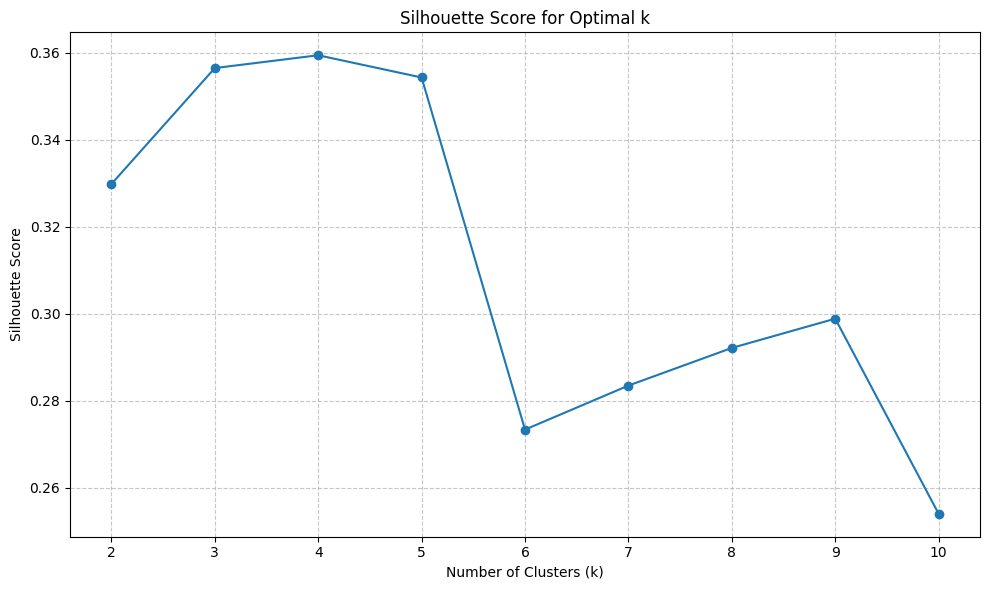

In [36]:
# Silhouette Score Analysis for Determining Optimal Number of Clusters
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
silhouette_scores = []
k_range = range(2, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_range)
plt.tight_layout()

# Find the optimal k based on silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
print(f"Maximum silhouette score: {max(silhouette_scores):.4f}")


Silhouette score berbeda dengan Elbow, disini K = 3 atau 4 menunjukkan skor terbaik. Nanti akan dicoba di clustering.

Calinski-Harabasz Index

adalah metrik evaluasi cluster yang mengukur rasio antara varians antar-cluster dan varians intra-cluster.

Nilai yang lebih tinggi menunjukkan cluster yang lebih terpisah dengan baik dan lebih padat.

Calinski-Harabasz Index dihitung dengan formula:

$$CH = \frac{SS_B}{SS_W} \times \frac{N-k}{k-1}$$

Dimana:
- $SS_B$ adalah jumlah kuadrat antar-cluster (between-cluster sum of squares)
- $SS_W$ adalah jumlah kuadrat intra-cluster (within-cluster sum of squares)
- $N$ adalah jumlah total data points
- $k$ adalah jumlah cluster

Semakin tinggi nilai indeks ini, semakin baik kualitas clustering yang dihasilkan.


Optimal number of clusters based on Calinski-Harabasz index: 2
Maximum Calinski-Harabasz index: 3284.6059


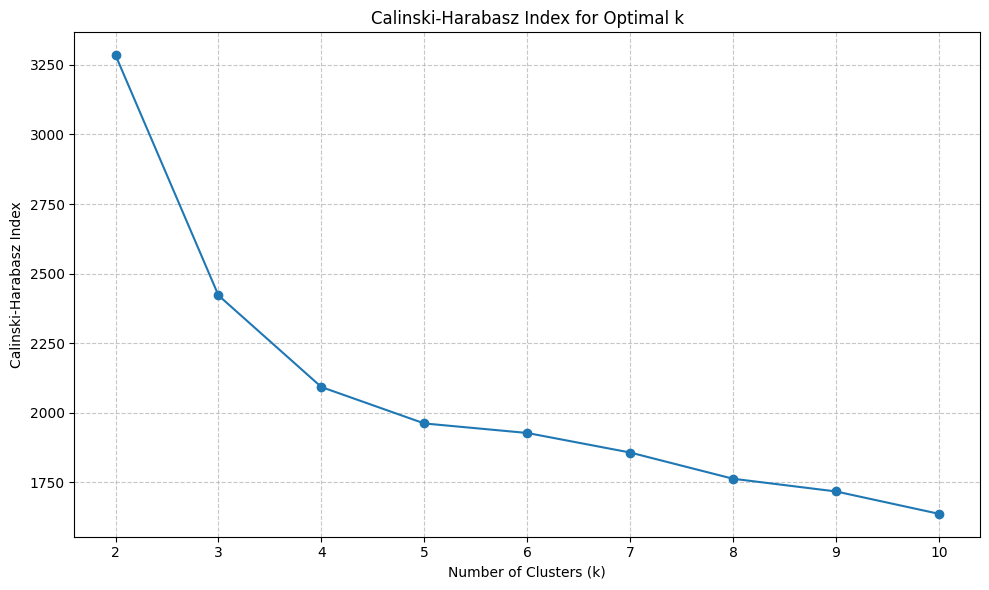

In [37]:
# Calinski-Harabasz Index Analysis for Determining Optimal Number of Clusters
from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz index for different values of k
ch_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    ch_index = calinski_harabasz_score(df_scaled, cluster_labels)
    ch_scores.append(ch_index)

plt.figure(figsize=(10, 6))
plt.plot(k_range, ch_scores, marker='o')
plt.title('Calinski-Harabasz Index for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_range)
plt.tight_layout()

optimal_k_ch = k_range[ch_scores.index(max(ch_scores))]
print(f"Optimal number of clusters based on Calinski-Harabasz index: {optimal_k_ch}")
print(f"Maximum Calinski-Harabasz index: {max(ch_scores):.4f}")



Index diatas menunjukkan bahwa K = 2 paling bagus, nanti akan kita coba di clustering.

# K-Means Clustering

K-Means Clustering adalah algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam K cluster berdasarkan kemiripan karakteristiknya. Algoritma ini bekerja dengan cara:

1. Menentukan jumlah cluster K yang diinginkan
2. Memilih K titik secara acak sebagai centroid awal
3. Mengelompokkan setiap data ke centroid terdekat
4. Menghitung ulang posisi centroid berdasarkan rata-rata data dalam cluster
5. Mengulangi langkah 3-4 hingga centroid tidak berubah signifikan

## Formula K-Means

K-Means berusaha meminimalkan Sum of Squared Distances (SSD) antara data dan centroid terdekatnya:

$$J = \sum_{i=1}^{n} \sum_{j=1}^{k} w_{ij} ||x_i - \mu_j||^2$$

Dimana:
- $J$ adalah fungsi objektif yang ingin diminimalkan
- $x_i$ adalah data point ke-i
- $\mu_j$ adalah centroid cluster ke-j
- $w_{ij}$ adalah 1 jika data $x_i$ termasuk cluster j, dan 0 jika tidak
- $||x_i - \mu_j||^2$ adalah jarak Euclidean kuadrat antara data dan centroid

Algoritma ini sederhana dan efisien, namun hasilnya dapat dipengaruhi oleh inisialisasi centroid awal dan jumlah cluster K yang ditentukan.



K-Means Cluster Centers (k=2):
                  x1        x2        x3        x4        x5        x6  \
Cluster_K2                                                               
0           0.997863  0.279041  0.214472  0.554498  0.190178  0.028604   
1           0.982040  0.367378  0.406349  0.339321  0.064976  0.166108   

                  x7        x8        x9       x10  ...       x13       x14  \
Cluster_K2                                          ...                       
0          -0.115549  0.045761  0.260229  0.033530  ...  0.316086 -0.115330   
1           0.110836 -0.045726 -0.001582  0.078088  ... -0.011420  0.035563   

                 x15       x16       x17       x18       x19       x20  \
Cluster_K2                                                               
0          -0.249796  0.093329  0.197649  0.009364 -0.100391 -0.119058   
1           0.043812 -0.008343 -0.018456  0.006173  0.000587  0.011463   

                 x21       x22  
Cluster_K2              

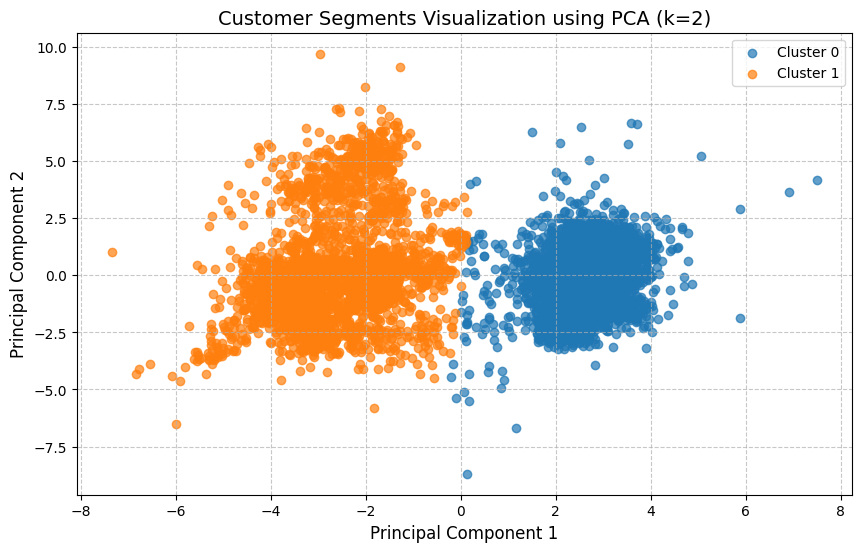

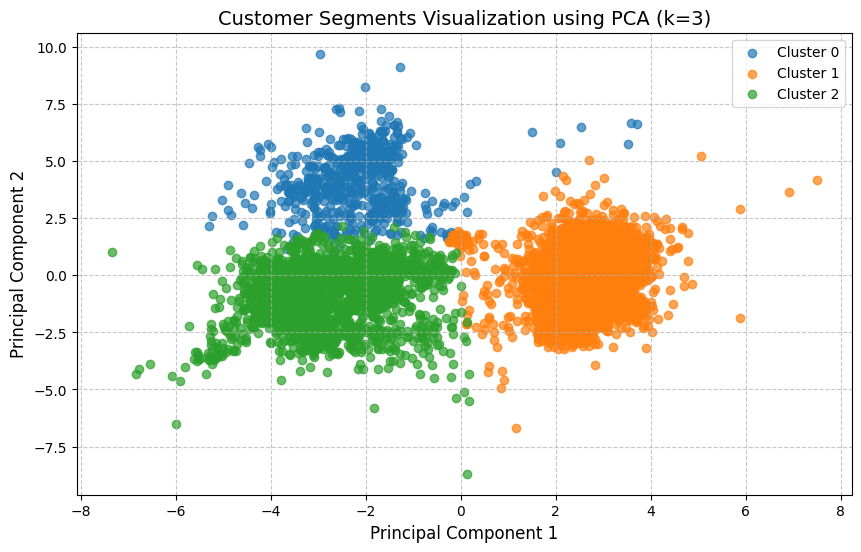

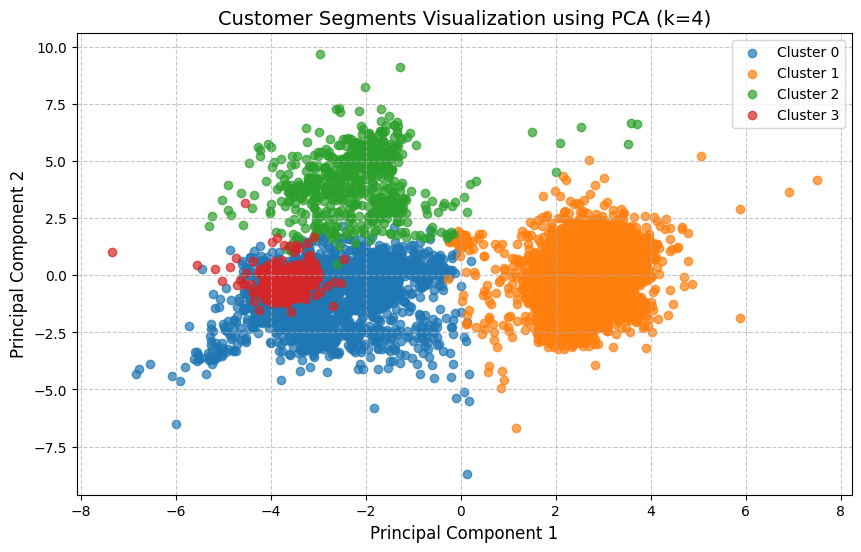

In [38]:
# Mencoba K-Means dengan beberapa jumlah cluster (2, 3, 4)
cluster_numbers = [2, 3, 4]

# Mereduksi dimensi data menjadi 2 komponen utama untuk visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Iterasi untuk setiap jumlah cluster
for k in cluster_numbers:
    # Membuat model K-Means
    # random_state=42 untuk memastikan hasil yang konsisten/reproducible
    # n_init=10 berarti algoritma akan dijalankan 10 kali dengan inisialisasi berbeda
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Melakukan fitting model dan prediksi cluster untuk setiap data
    cluster_column = f'Cluster_K{k}'
    df[cluster_column] = kmeans.fit_predict(df_scaled)
    
    # Menganalisis karakteristik setiap cluster dengan menghitung nilai rata-rata fitur
    cluster_analysis = df.groupby(cluster_column).mean()
    print(f"\nK-Means Cluster Centers (k={k}):")
    print(cluster_analysis)
    
    cluster_sizes = df[cluster_column].value_counts().sort_index()
    print(f"\nK-Means Cluster Sizes (k={k}):")
    print(cluster_sizes)
    
    plt.figure(figsize=(10, 6))
    for cluster in range(k):
        plt.scatter(X_pca[df[cluster_column] == cluster, 0],
                    X_pca[df[cluster_column] == cluster, 1],
                    label=f'Cluster {cluster}',
                    alpha=0.7)
    
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.title(f'Customer Segments Visualization using PCA (k={k})', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)


Clustering 2 atau 3 cukup baik, namun pada clustering 4 terdapat overlap pada cluster terakhir. Jadi 2 atau 3 paling baik.

# Hierarchical Clustering dan Dendrogram

Hierarchical Clustering adalah teknik clustering yang membangun hierarki cluster dengan pendekatan "bottom-up" (agglomerative) atau "top-down" (divisive). Dalam analisis ini, kita menggunakan metode agglomerative yang bekerja dengan langkah-langkah berikut:

1. Mulai dengan menganggap setiap data point sebagai cluster individual
2. Secara iteratif menggabungkan dua cluster terdekat hingga semua data point berada dalam satu cluster
3. Hasil akhirnya adalah struktur hierarki yang dapat divisualisasikan sebagai dendrogram

Dendrogram adalah representasi visual berbentuk diagram pohon yang menunjukkan urutan penggabungan cluster dan jarak antar cluster. Sumbu vertikal menunjukkan jarak atau dissimilarity antar cluster, sedangkan sumbu horizontal menunjukkan data points atau cluster.

Formula dasar untuk menghitung jarak antar cluster menggunakan metode Ward:

$$d(u,v) = \sqrt{\frac{|v| \times |s|}{|v|+|s|}} \times ||v-s||_2$$

Dimana:
- $u$ adalah cluster baru hasil penggabungan cluster $v$ dan $s$
- $|v|$ dan $|s|$ adalah ukuran cluster
- $||v-s||_2$ adalah jarak Euclidean antara centroid cluster

Keuntungan Hierarchical Clustering:
- Tidak perlu menentukan jumlah cluster di awal
- Memberikan visualisasi hierarki yang membantu memahami struktur data
- Memungkinkan pemilihan jumlah cluster yang optimal berdasarkan dendrogram


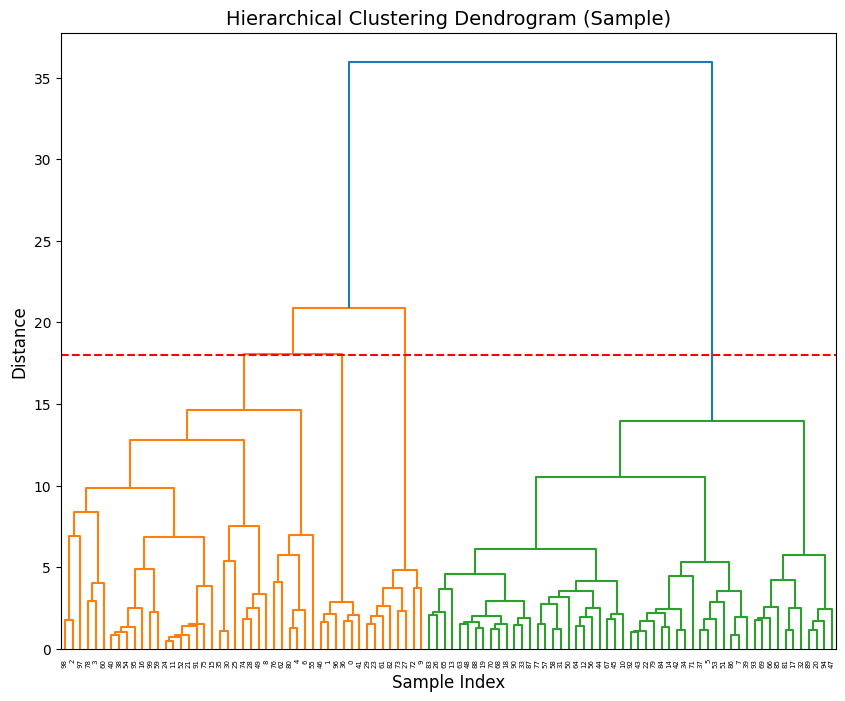


Hierarchical Cluster Centers (k=2):
                              x1        x2        x3        x4        x5  \
Cluster_Hierarchical_2                                                     
0                       0.982070  0.363991  0.403984  0.346258  0.070047   
1                       0.998237  0.280400  0.212090  0.552590  0.187962   

                              x6        x7        x8        x9       x10  ...  \
Cluster_Hierarchical_2                                                    ...   
0                       0.163448  0.105290 -0.043966  0.003828  0.078268  ...   
1                       0.027928 -0.115414  0.046221  0.261146  0.032197  ...   

                             x16       x17       x18       x19      x20  \
Cluster_Hierarchical_2                                                    
0                      -0.008581 -0.014582  0.008459 -0.000002  0.00864   
1                       0.096185  0.199038  0.007003 -0.102345 -0.11938   

                             x21

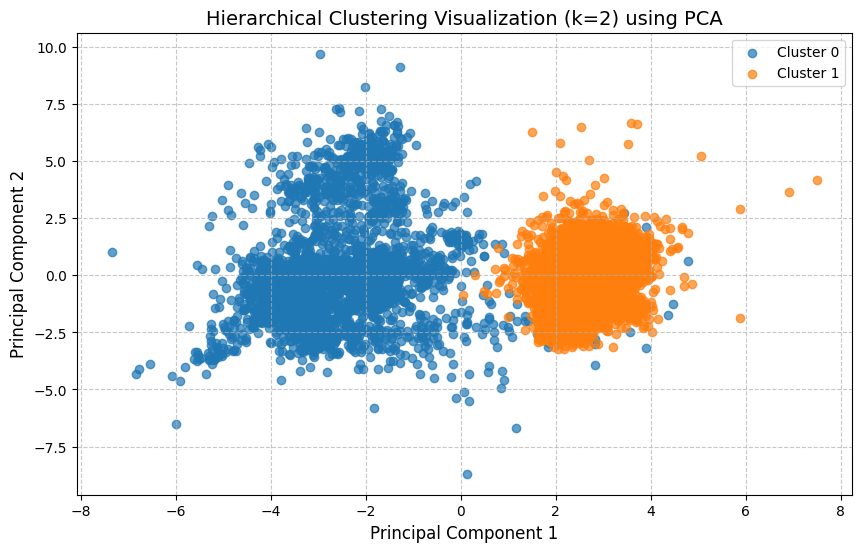


Hierarchical Cluster Centers (k=3):
                              x1        x2        x3        x4        x5  \
Cluster_Hierarchical_3                                                     
0                       0.998642  0.305383  0.337281  0.339676  0.092978   
1                       0.998237  0.280400  0.212090  0.552590  0.187962   
2                       0.892981  0.679044  0.762556  0.381643 -0.053223   

                              x6        x7        x8        x9       x10  ...  \
Cluster_Hierarchical_3                                                    ...   
0                       0.158497  0.116824 -0.066663 -0.024248  0.120497  ...   
1                       0.027928 -0.115414  0.046221  0.261146  0.032197  ...   
2                       0.190063  0.043286  0.078046  0.154756 -0.148740  ...   

                             x17       x18       x19       x20       x21  \
Cluster_Hierarchical_3                                                     
0                       

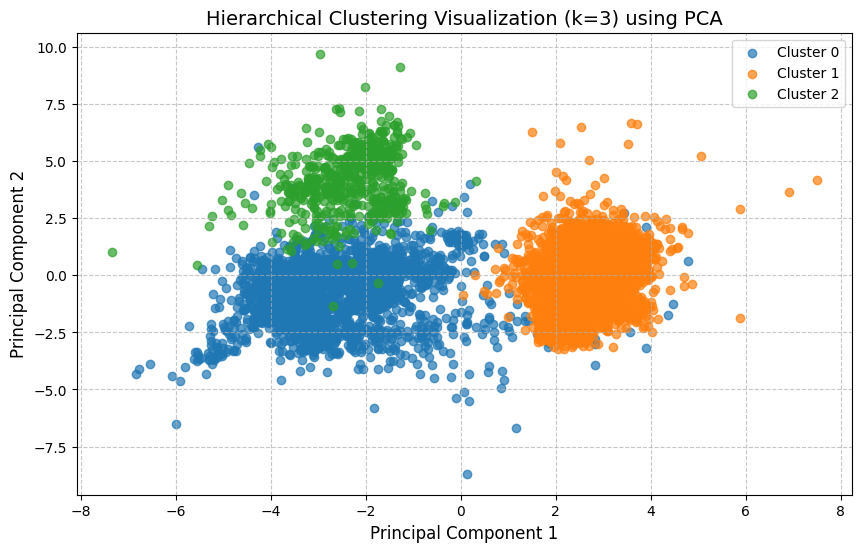


Hierarchical Cluster Centers (k=4):
                              x1        x2        x3        x4        x5  \
Cluster_Hierarchical_4                                                     
0                       0.998287  0.323604  0.431015  0.353804  0.029643   
1                       0.998237  0.280400  0.212090  0.552590  0.187962   
2                       0.892981  0.679044  0.762556  0.381643 -0.053223   
3                       1.000000  0.235750 -0.020928  0.285682  0.335014   

                              x6        x7        x8        x9       x10  ...  \
Cluster_Hierarchical_4                                                    ...   
0                       0.147279  0.154866 -0.050415 -0.037328  0.091773  ...   
1                       0.027928 -0.115414  0.046221  0.261146  0.032197  ...   
2                       0.190063  0.043286  0.078046  0.154756 -0.148740  ...   
3                       0.201368 -0.028555 -0.128753  0.025735  0.230267  ...   

                   

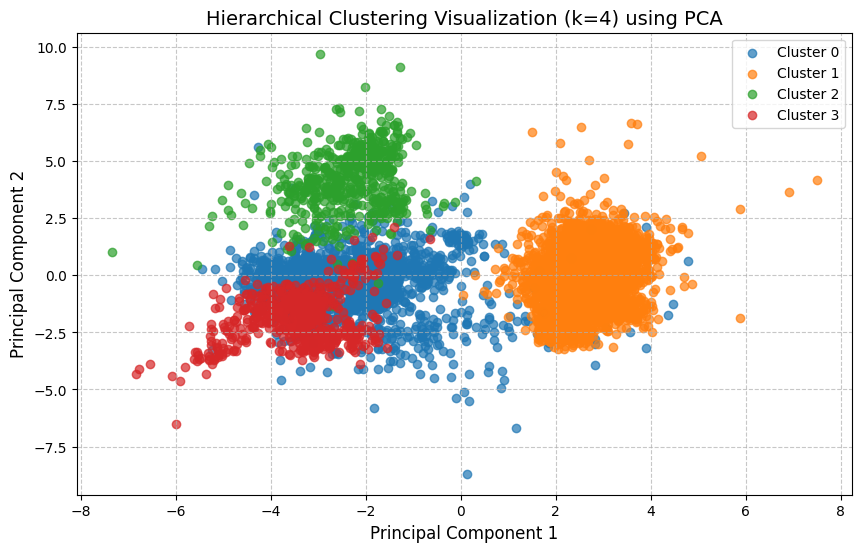

In [39]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Try different numbers of clusters
cluster_numbers = [2, 3, 4]

# Mengambil sampel data untuk dendrogram karena data lengkap terlalu besar
plt.figure(figsize=(10, 8))
sample_size = min(100, df_scaled.shape[0])
indices = np.random.choice(range(df_scaled.shape[0]), sample_size, replace=False)
sample_data = df_scaled[indices]

linked = linkage(sample_data, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Sample)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=np.max(linked[:, 2])/2, color='r', linestyle='--')
plt.show()

# Membuat model dan visualisasi untuk setiap jumlah cluster
for n_clusters in cluster_numbers:
    hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    
    cluster_column = f'Cluster_Hierarchical_{n_clusters}'
    df[cluster_column] = hierarchical_cluster.fit_predict(df_scaled)
    
    # Menganalisis karakteristik setiap cluster dengan menghitung nilai rata-rata
    cluster_analysis_hierarchical = df.groupby(cluster_column).mean()
    print(f"\nHierarchical Cluster Centers (k={n_clusters}):")
    print(cluster_analysis_hierarchical)
    
    cluster_sizes_hierarchical = df[cluster_column].value_counts().sort_index()
    print(f"\nHierarchical Cluster Sizes (k={n_clusters}):")
    print(cluster_sizes_hierarchical)
    
    pca = PCA(n_components=2)
    X_pca_hierarchical = pca.fit_transform(df_scaled)
    
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        plt.scatter(X_pca_hierarchical[df[cluster_column] == cluster, 0],
                    X_pca_hierarchical[df[cluster_column] == cluster, 1],
                    label=f'Cluster {cluster}',
                    alpha=0.7)
    
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.title(f'Hierarchical Clustering Visualization (k={n_clusters}) using PCA', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


Kasusnya sama seperti di K-Means, clustering 2 atau 3 baik, dan clustering 4 kurang baik karena menumpuk atau masuk ke cluster lain.

# Kesimpulan

1. Data tidak perlu dipreprocessing.
2. Elbow method dan Calinski menunjukkan bahwa K = 2 terbaik, sedangkan Silhouette menunjukkan K = 3 atau 4 terbaik.
3. Berdasarkan percobaan di K-Means dan Hierarchal, K = 2 atau 3 terbaik.
4. K-Means sedikit lebih baik dibanding Hierarchal.